---
title: "Multiple Regression"
author: "Devakinandan Palla"
format: 
  html:
    theme: cosmo
    embed-resources: true
---


# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
# Code Here
!pip install palmerpenguins

In [3]:
import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()

In [4]:
penguins.head()
penguins_dummified = pd.get_dummies(penguins, drop_first=True)

In [5]:
penguins_dummified.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
3,NaN,NaN,NaN,NaN,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [ ]:
# Code Here

In [7]:
print(X_train.columns)

Index(['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'year',
       'species_Chinstrap', 'species_Gentoo', 'island_Dream',
       'island_Torgersen', 'sex_male'],
      dtype='object')


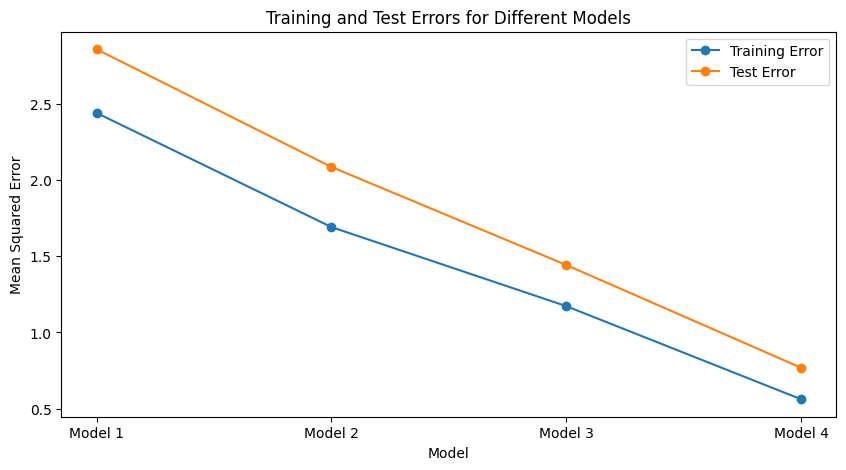

The best model is Model 4 with the lowest test error.


In [9]:
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

penguins = load_penguins()
penguins = penguins.dropna()

penguins_dummified = pd.get_dummies(penguins, drop_first=True)

X_full = penguins_dummified.drop('bill_depth_mm', axis=1)
y = penguins_dummified['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.3, random_state=42)

# Model 1
features_1 = ['flipper_length_mm', 'body_mass_g']
model_1 = LinearRegression()
model_1.fit(X_train[features_1], y_train)
train_error_1 = mean_squared_error(y_train, model_1.predict(X_train[features_1]))
test_error_1 = mean_squared_error(y_test, model_1.predict(X_test[features_1]))

# Model 2
features_2 = ['island_Dream', 'island_Torgersen', 'sex_male']
model_2 = LinearRegression()
model_2.fit(X_train[features_2], y_train)
train_error_2 = mean_squared_error(y_train, model_2.predict(X_train[features_2]))
test_error_2 = mean_squared_error(y_test, model_2.predict(X_test[features_2]))

# Model 3
features_3 = ['species_Chinstrap', 'species_Gentoo']
model_3 = LinearRegression()
model_3.fit(X_train[features_3], y_train)
train_error_3 = mean_squared_error(y_train, model_3.predict(X_train[features_3]))
test_error_3 = mean_squared_error(y_test, model_3.predict(X_test[features_3]))

features_4 = ['flipper_length_mm', 'body_mass_g', 'species_Chinstrap', 'species_Gentoo', 'sex_male']
model_4 = LinearRegression()
model_4.fit(X_train[features_4], y_train)
train_error_4 = mean_squared_error(y_train, model_4.predict(X_train[features_4]))
test_error_4 = mean_squared_error(y_test, model_4.predict(X_test[features_4]))

# Plotting errors
train_errors = [train_error_1, train_error_2, train_error_3, train_error_4]
test_errors = [test_error_1, test_error_2, test_error_3, test_error_4]

plt.figure(figsize=(10, 5))
plt.plot(['Model 1', 'Model 2', 'Model 3', 'Model 4'], train_errors, label='Training Error', marker='o')
plt.plot(['Model 1', 'Model 2', 'Model 3', 'Model 4'], test_errors, label='Test Error', marker='o')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Errors for Different Models')
plt.legend()
plt.show()

best_model_index = test_errors.index(min(test_errors))
print(f"The best model is Model {best_model_index + 1} with the lowest test error.")


Model 4 is the best-performing model, as evidenced by its lowest test error, indicating it strikes the right balance between underfitting and overfitting and generalizes well to unseen data